## **Task Overview**

In this task, I have been assigned to Standardize and Normalize Data.

I will use the following techniques to Normalize and Standardize data:

1. MinMaxScalar for normalizing data between 0 and 1 as it is sensitive to noise or outliers.
2. StandardScalar for standardizing data close to 0 with unit variance, as it is not sensitive to noise or outliers.

I will work on Red Wine Dataset.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
df = pd.read_csv('wineQuality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Extracting Features and Target Data Frame and Series respectively.

In [25]:
target_df = pd.Series(df['quality'])
features_df = pd.DataFrame(df.drop('quality', axis=1))
features_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
#Extracting Column Names
cols = features_df.columns.tolist()

# Normalizing Data with MinMaxScalar.
mmScalar = MinMaxScaler()

normalized_df = pd.DataFrame(mmScalar.fit_transform(features_df), columns=cols)
normalized_df['quality'] = target_df
normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [27]:
# Standardizing Data.
sScalar = StandardScaler()
standardized_df = pd.DataFrame(sScalar.fit_transform(features_df), columns=cols)
standardized_df['quality'] = target_df
standardized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


### **Plotting Graphs for Fixed Acidity and Analyse How the data has been distribubted.**

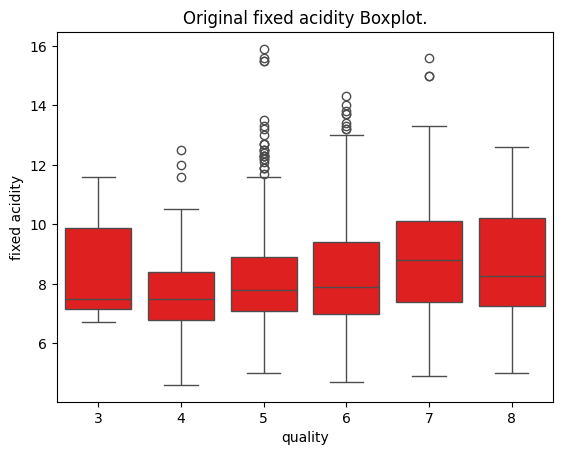

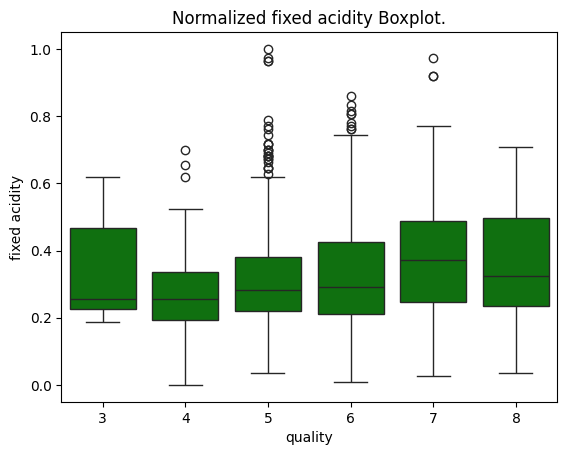

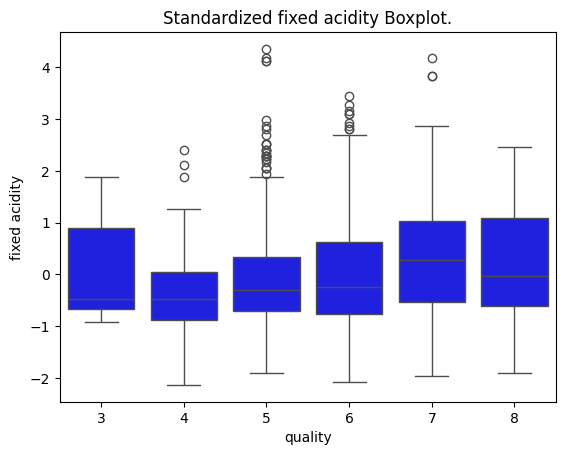

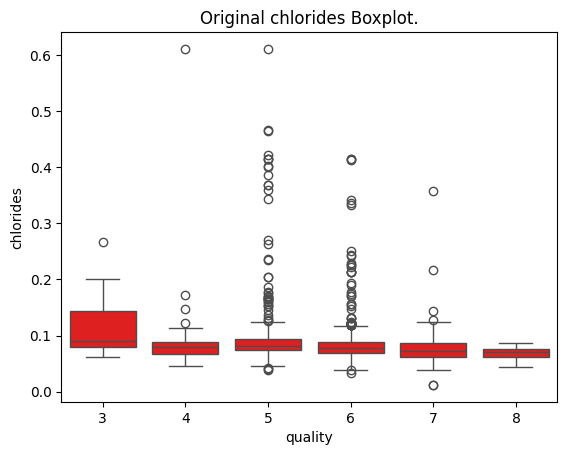

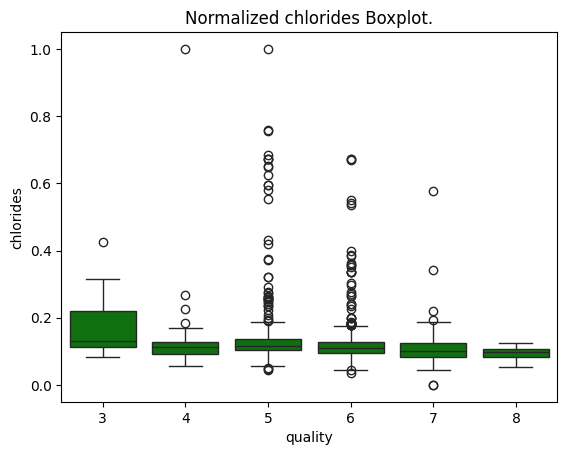

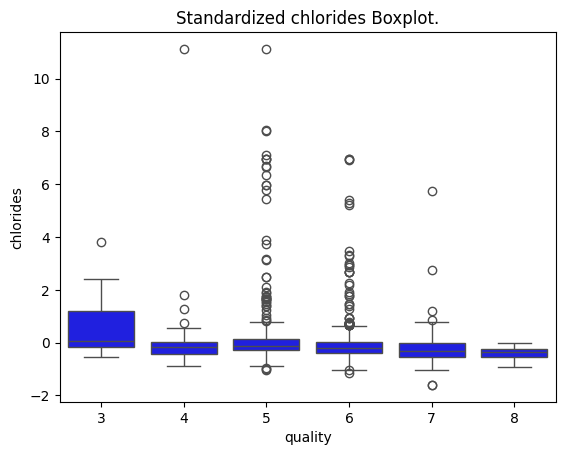

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features =  ['fixed acidity', 'chlorides']

for feature in selected_features:
    sns.boxplot(df, x='quality', y=feature,color='red')
    plt.title(f"Original {feature} Boxplot.")
    plt.show()

    sns.boxplot(normalized_df, x='quality', y=feature, color='green')
    plt.title(f"Normalized {feature} Boxplot.")
    plt.show()

    sns.boxplot(standardized_df, x='quality', y=feature, color='blue')
    plt.title(f'Standardized {feature} Boxplot.')
    plt.show()